# Classification Neural Network

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:

# Importing prepared dataset
import pickle
input = open('data_LogRegr.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

In [3]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [4]:

# Initialising the ANN
cnn = Sequential()

# Adding the input layer and the first hidden layer
cnn.add(Dense(13, activation = 'relu', input_dim = 13))

# Adding the output layer
cnn.add(Dense(8, activation = 'sigmoid'))

# Adding the output layer
cnn.add(Dense(4, activation = 'sigmoid'))

# Adding the output layer
cnn.add(Dense(1, activation = 'sigmoid'))

# Compiling the ANN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [5]:
import sys
sys.setrecursionlimit(10000)

In [6]:
# Fitting the ANN to the Training set
history = cnn.fit(X_train, y_train, batch_size = 30, epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100
224/224 [==============================] - 3s 3ms/step - loss: 0.6323 - accuracy: 0.6920 - val_loss: 0.5774 - val_accuracy: 0.7095
Epoch 2/100
224/224 [==============================] - 0s 2ms/step - loss: 0.5452 - accuracy: 0.6920 - val_loss: 0.4888 - val_accuracy: 0.7095
Epoch 3/100
224/224 [==============================] - 0s 2ms/step - loss: 0.4814 - accuracy: 0.6920 - val_loss: 0.4399 - val_accuracy: 0.7095
Epoch 4/100
224/224 [==============================] - 0s 2ms/step - loss: 0.4457 - accuracy: 0.6920 - val_loss: 0.4140 - val_accuracy: 0.7095
Epoch 5/100
224/224 [==============================] - 0s 1ms/step - loss: 0.4245 - accuracy: 0.7921 - val_loss: 0.3994 - val_accuracy: 0.8411
Epoch 6/100
224/224 [==============================] - 0s 2ms/step - loss: 0.4108 - accuracy: 0.8293 - val_loss: 0.3891 - val_accuracy: 0.8393
Epoch 7/100
224/224 [==============================] - 0s 1ms/step - loss: 0.4013 - accuracy: 0.8256 - val_loss: 0.3819 - val_accuracy: 0.8345

Epoch 58/100
224/224 [==============================] - 0s 1ms/step - loss: 0.3412 - accuracy: 0.8423 - val_loss: 0.3338 - val_accuracy: 0.8440
Epoch 59/100
224/224 [==============================] - 0s 1ms/step - loss: 0.3404 - accuracy: 0.8448 - val_loss: 0.3341 - val_accuracy: 0.8435
Epoch 60/100
224/224 [==============================] - 0s 1ms/step - loss: 0.3407 - accuracy: 0.8418 - val_loss: 0.3325 - val_accuracy: 0.8500
Epoch 61/100
224/224 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.8421 - val_loss: 0.3335 - val_accuracy: 0.8423
Epoch 62/100
224/224 [==============================] - 0s 2ms/step - loss: 0.3402 - accuracy: 0.8417 - val_loss: 0.3338 - val_accuracy: 0.8446
Epoch 63/100
224/224 [==============================] - 0s 2ms/step - loss: 0.3394 - accuracy: 0.8436 - val_loss: 0.3306 - val_accuracy: 0.8470
Epoch 64/100
224/224 [==============================] - 0s 2ms/step - loss: 0.3401 - accuracy: 0.8421 - val_loss: 0.3321 - val_accuracy:

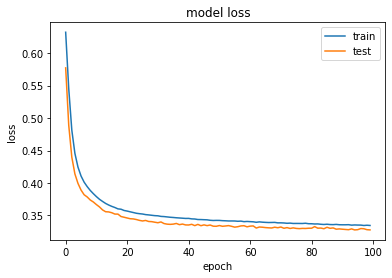

In [7]:
# Plotting loss & accuracy
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [8]:
# Predicting the Test set results
y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.6)

In [9]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1116   76]
 [ 163  325]]


Итак, построена Нейронная Сеть для модели классификации. Был проведен ряд экспериментов с множеством параметров, таких как: количество слоев, число batch_size, порог отсечения. 
1. Оптимальное количество слоев - 3 (на 2 слоях примерно на 10 обьектов больше неверно распознаются)
2. batch_size изменялось от 8 до 60, однако оптимальным является 30. Остальные случаи уменьшают верное распознавание от 2 до 10-15 обьектов.
3. Порог отсичения - оптимальное значение при y_pred > 0.6. Этот параметр наибольшим образом влияет на правильность распознавания обьектов и при изменении на 0,1 - до 30 обьектов могут быть неверно распознаны.

Таким образом, в данной моделе при оптимальных параметрах неверно распознано 239 обьектов, что дает немного лучше результат, чем в моделе Логистической регрессиии. Модель пригодна для использования и выполняет качественно классификационную задачу.